Eigen values for n= 0: 0.9999999767771443
Eigen values for n= 1: 2.999999401944479
Eigen values for n= 2: 4.999989530390851
Eigen values for n= 3: 6.999883168882483
Eigen values for n= 4: 8.999060606903189
Eigenfunctions:
[[2.56183470e-04 1.45461736e-03 5.66711043e-03 1.74588473e-02
  4.50516581e-02]
 [3.76940965e-04 2.08377489e-03 7.88695716e-03 2.35399838e-02
  5.86293690e-02]
 [5.51714864e-04 2.96901781e-03 1.09156754e-02 3.15583001e-02
  7.58483958e-02]
 [8.01216066e-04 4.19588715e-03 1.49786781e-02 4.19281002e-02
  9.71899061e-02]
 [1.15311660e-03 5.87359613e-03 2.03472413e-02 5.51048286e-02
  1.23080898e-01]
 [1.64382706e-03 8.13893182e-03 2.73391696e-02 7.15653847e-02
  1.53831231e-01]
 [2.32055909e-03 1.11600069e-02 3.63163648e-02 9.17795041e-02
  1.89559851e-01]
 [3.24364379e-03 1.51394491e-02 4.76780810e-02 1.16171080e-01
  2.30113234e-01]
 [4.48904553e-03 2.03165046e-02 6.18486348e-02 1.45069151e-01
  2.74981544e-01]
 [6.15097107e-03 2.69674234e-02 7.92584568e-02 1.78649425e

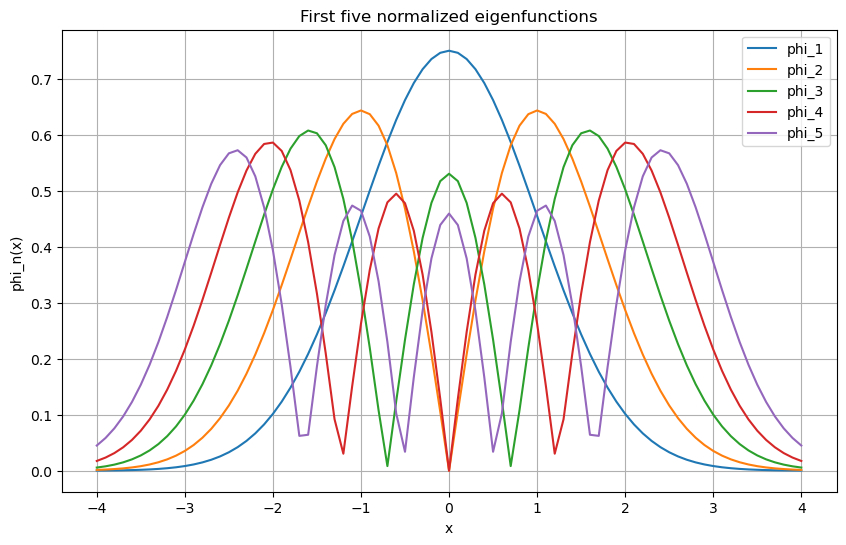

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants from the question
L = 4  #Setting L=4
K = 1  
xspan = np.linspace(-L, L, 81)  
epsilon_n = 0  
d_epsilon = 0.2  
tol = 1e-6  
n_max = 5  

def harmonic_shoot(y, x, epsilon):
    return [y[1], (K * x**2 - epsilon) * y[0]]

eigenfunction = []
eigenvalue = []

for n in range(n_max):
    epsilon_guess = epsilon_n
    d_epsilon = 0.2
    for _ in range(1000):  
        phi0 = [1, np.sqrt(L**2 - epsilon_guess)]  
        y = odeint(harmonic_shoot, phi0, xspan, args=(epsilon_guess,))  
        phi_guess = y[-1, 1] + np.sqrt(L**2 - epsilon_guess) * y[-1, 0]
        if abs(phi_guess) < tol:  
            print(f"Eigen values for n= {n}: {epsilon_guess}")
            eigenvalue.append(epsilon_guess) 
            break

        if (-1) ** (n) * phi_guess > 0:
            epsilon_guess += d_epsilon
        else:
            epsilon_guess -= d_epsilon / 2
            d_epsilon /= 2

    norm = np.trapz(y[:, 0] ** 2, xspan) 
    normalized_eigenfunction = abs(y[:, 0]) / np.sqrt(norm)  
    epsilon_n = epsilon_guess + 0.1
    eigenfunction.append(normalized_eigenfunction)

eigenfunctions = np.column_stack(eigenfunction)
eigenvalues = np.array(eigenvalue)

A1 = eigenfunctions
A2 = eigenvalues

# Output 
print("Eigenfunctions:")
print(A1)
print("Eigenvalues:")
print(A2)
#print(A1 [1,2])

# Plotting the solutions
plt.figure(figsize=(10, 6))
for i in range(n_max):
    plt.plot(xspan, eigenfunctions[:,i], label=f'phi_{i+1}')  

plt.legend()
plt.title('First five normalized eigenfunctions')
plt.xlabel('x')
plt.ylabel('phi_n(x)')
plt.grid(True)
plt.show()


Eigenfunctions A3:
[[5.25330699e-04 2.98456752e-03 1.16813848e-02 3.63684946e-02
  9.51957970e-02]
 [5.65512105e-04 3.17867592e-03 1.23103575e-02 3.79292078e-02
  9.82713969e-02]
 [6.86056325e-04 3.76100113e-03 1.41972756e-02 4.26113473e-02
  1.07498197e-01]
 [8.98810812e-04 4.77370376e-03 1.74256365e-02 5.04721278e-02
  1.22626002e-01]
 [1.22563002e-03 6.29686622e-03 2.21697827e-02 6.17193919e-02
  1.43565545e-01]
 [1.69904226e-03 8.44739559e-03 2.86805487e-02 7.66572358e-02
  1.70261204e-01]
 [2.36360740e-03 1.13795761e-02 3.72731192e-02 9.56346180e-02
  2.02574461e-01]
 [3.27778429e-03 1.52862080e-02 4.83140093e-02 1.18991694e-01
  2.40173697e-01]
 [4.51615457e-03 2.03994049e-02 6.22047465e-02 1.47000883e-01
  2.82430861e-01]
 [6.17184584e-03 2.69901636e-02 7.93603578e-02 1.79801729e-01
  3.28329688e-01]
 [8.35897169e-03 3.53658252e-02 1.00181301e-01 2.17330662e-01
  3.76393521e-01]
 [1.12148676e-02 4.58645543e-02 1.25018106e-01 2.59248830e-01
  4.24643293e-01]
 [1.49018556e-02 5.88

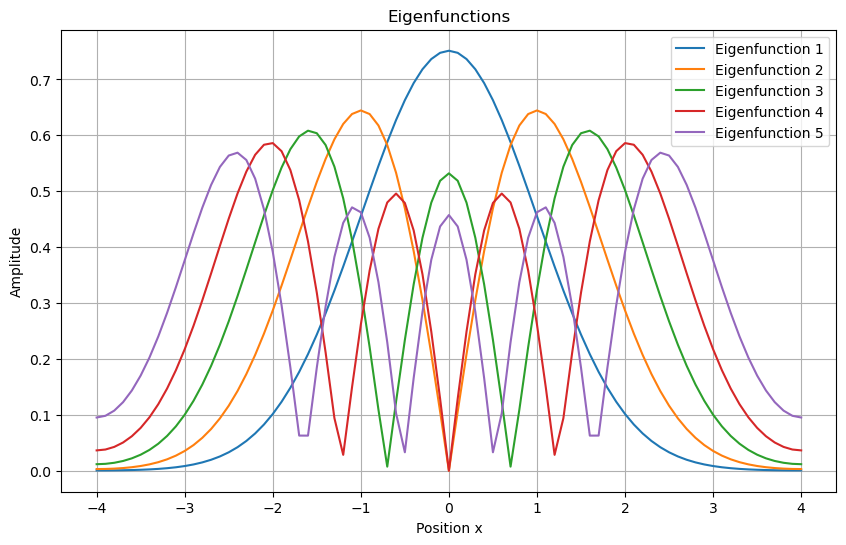

In [ ]:
# Part b
import numpy as np
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt

L = 4
x = np.arange(-L, L + 0.1, 0.1)
n = len(x)
dx = x[1] - x[0]

M = np.zeros((n - 2, n - 2))

for j in range(n - 2):
    M[j, j] = -2 - (dx**2) * x[j + 1]**2
    if j < n - 3:
        M[j + 1, j] = 1
        M[j, j + 1] = 1

M[0, 0] = M[0, 0] + 4 / 3
M[0, 1] = M[0, 1] - 1 / 3
M[-1, -1] = M[-1, -1] + 4 / 3
M[-1, -2] = M[-1, -2] - 1 / 3

eigvals, eigvecs = eigs(-M, k=5, which='SM')

vals2 = np.vstack([4/3 * eigvecs[0,:] - 1/3 * eigvecs[1, :], eigvecs, 4/3 * eigvecs[-1, :] - 1/3 * eigvecs[-2, :]])

eigenvecs = np.zeros((n, 5))
eigenvals = np.zeros(5)

for j in range (5):
    norm = np.sqrt(np.trapz(vals2[:, j]**2, x))
    eigenvecs[:, j] = np.abs(vals2[:, j] / norm)

eigenvals = np.sort(eigvals[:5] / dx**2)

A3 = eigenvecs
A4 = eigenvals

print("Eigenfunctions A3:")
print(A3,"\n")
print("Eigenvalues A4:")
print(A4,"\n")

# Plot eigenfunctions
plt.figure(figsize=(10, 6))
for j in range(5):
    plt.plot(x, A3[:, j], label=f'Eigenfunction {j+1}')
plt.xlabel('Position x')
plt.ylabel('Amplitude')
plt.title('Eigenfunctions')
plt.legend()
plt.grid(True)
plt.show()



A5 Eigenvalues for gamma = 0.05:
 [[1.10635766e-01 3.42979516e-01]
 [1.31429470e-01 3.80290457e-01]
 [1.55625523e-01 4.20298338e-01]
 [1.83290905e-01 4.61667507e-01]
 [2.14401682e-01 5.02862063e-01]
 [2.48823179e-01 5.42238220e-01]
 [2.86309974e-01 5.78044314e-01]
 [3.26505902e-01 6.08420795e-01]
 [3.69036730e-01 6.31522342e-01]
 [4.13260479e-01 6.45529961e-01]
 [4.58263690e-01 6.48549700e-01]
 [5.03127115e-01 6.39141082e-01]
 [5.46926595e-01 6.16335269e-01]
 [5.88733062e-01 5.79635054e-01]
 [6.27612539e-01 5.29014869e-01]
 [6.62626141e-01 4.64973232e-01]
 [6.92830070e-01 3.88665882e-01]
 [7.17275622e-01 3.01711236e-01]
 [7.35111491e-01 2.06173753e-01]
 [7.45946372e-01 1.04565328e-01]
 [7.49550190e-01 1.54698416e-04]
 [7.45860849e-01 1.04703472e-01]
 [7.34990607e-01 2.06208000e-01]
 [7.17226065e-01 3.01753292e-01]
 [6.93028179e-01 3.88786189e-01]
 [6.63032249e-01 4.65194384e-01]
 [6.28047927e-01 5.29306421e-01]
 [5.89058106e-01 5.79914898e-01]
 [5.47125643e-01 6.16553945e-01]
 [5.03261

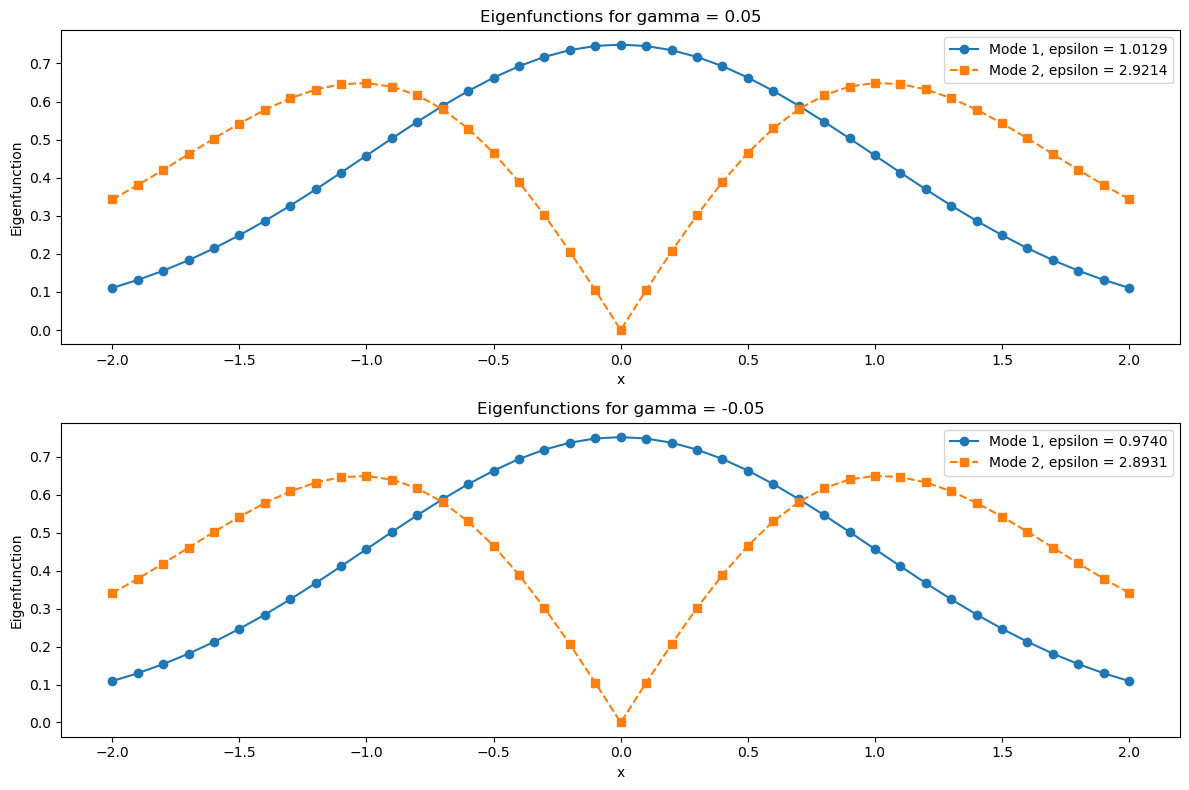

In [24]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


def partc_rhs(x, y, epsilon, gamma):
    return[y[1], (gamma * y[0]**2 + x**2 - epsilon) * y[0]]

L = 2
x = np.arange(-L, L + 0.1, 0.1)
n = len(x)
tol = 1e-4
eigenvals_pos, eigenvals_neg = np.zeros(2), np.zeros(2)
eigenvecs_pos, eigenvecs_neg = np.zeros((n, 2)), np.zeros((n, 2))

for gamma in [0.05, -0.05]:
    epsilon0, A = 0.1, 1e-6
    for jmodes in range(2):
        dA = 0.01
        for jj in range(100):
            epsilon, d_epsilon = epsilon0, 0.2
            for j in range(100):
                y0 = [A, np.sqrt(L**2 - epsilon) * A]
                sol = solve_ivp(lambda x, y: partc_rhs(x, y, epsilon, gamma), [x[0], x[-1]], y0, t_eval=x)
                y_sol = sol.y.T
                x_sol = sol.t

                bc = y_sol[-1, 1] + np.sqrt(L**2 - epsilon) * y_sol[-1, 0]
                if abs(bc) < tol:
                    break
                
                if (-1)**(jmodes) * bc > 0:
                    epsilon += d_epsilon
                else:
                    epsilon -= d_epsilon
                    d_epsilon /= 2

            area = np.trapz(y_sol[:, 0]**2, x_sol)
            if abs(area - 1) < tol:
                break
            if area < 1:
                A += dA
            else:
                A -= dA
                dA /= 2
            
        epsilon0=epsilon+0.2
        if gamma > 0:
            eigenvals_pos[jmodes] = epsilon
            eigenvecs_pos[:, jmodes] = np.abs(y_sol[:, 0])
        else:
            eigenvals_neg[jmodes] = epsilon
            eigenvecs_neg[:, jmodes] = np.abs(y_sol[:, 0])

A5 = eigenvecs_pos
A6 = eigenvals_pos
A7 = eigenvecs_neg
A8 = eigenvals_neg

print("A5 Eigenvalues for gamma = 0.05:\n", A5, "\n")
print("A6 Eigenfunctions for gamma = 0.05:\n", A6, "\n")
print("A7 Eigenvalues for gamma = -0.05:\n", A7, "\n")
print("A8 Eigenfunctions for gamma = -0.05:\n", A8)

# Plotting
plt.figure(figsize=(12, 8))

# Plot for gamma = 0.05
plt.subplot(2, 1, 1)
plt.plot(x, A5[:, 0], label=f'Mode 1, epsilon = {A6[0]:.4f}', linestyle='-', marker='o')
plt.plot(x, A5[:, 1], label=f'Mode 2, epsilon = {A6[1]:.4f}', linestyle='--', marker='s')
plt.title("Eigenfunctions for gamma = 0.05")
plt.xlabel("x")
plt.ylabel("Eigenfunction")
plt.legend()

# Plot for gamma = -0.05
plt.subplot(2, 1, 2)
plt.plot(x, A7[:, 0], label=f'Mode 1, epsilon = {A8[0]:.4f}', linestyle='-', marker='o')
plt.plot(x, A7[:, 1], label=f'Mode 2, epsilon = {A8[1]:.4f}', linestyle='--', marker='s')
plt.title("Eigenfunctions for gamma = -0.05")
plt.xlabel("x")
plt.ylabel("Eigenfunction")
plt.legend()

plt.tight_layout()
plt.show()

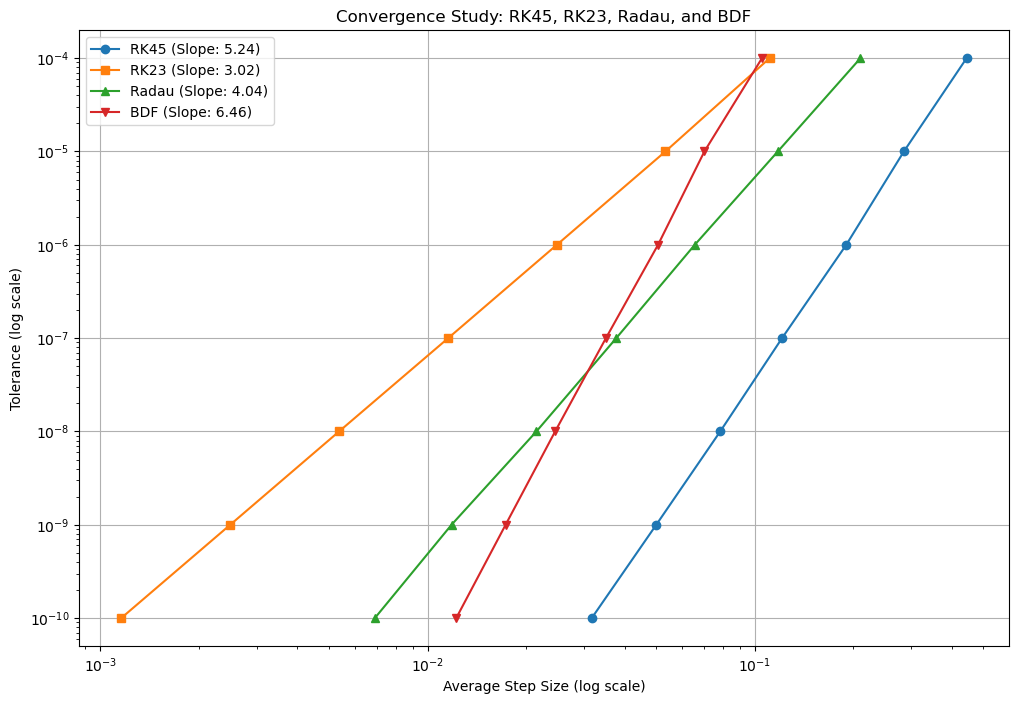

Slopes for RK45, RK23, Radau, and BDF (A9): [5.24466756 3.01909953 4.03819927 6.45751261]


In [ ]:
# Part d
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
L = 2
K = 1
epsilon = 1  # Fixed energy level
gamma = 0  # Nonlinearity is zero
tolerances = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]

# Define the RHS of the ODE
def harmonic_oscillator_rhs(x, y):
    phi, dphi = y
    d2phi = (K * x**2 - epsilon) * phi
    return [dphi, d2phi]

# Initial conditions
y0 = [1, np.sqrt(K * L**2 - epsilon)]
x_span = [-L, L]

# Function to compute step sizes and errors for different methods
def convergence_study(method):
    avg_step_sizes = []

    for tol in tolerances:
        # Solve the ODE
        sol = solve_ivp(
            harmonic_oscillator_rhs,
            x_span,
            y0,
            method=method,
            rtol=tol,
            atol=tol,
        )
        
        # Compute the average step size
        step_sizes = np.diff(sol.t)
        avg_step_size = np.mean(step_sizes)
        avg_step_sizes.append(avg_step_size)

    return np.array(avg_step_sizes)

# Run convergence studies for RK45, RK23, Radau, and BDF
rk45_steps = convergence_study('RK45')
rk23_steps = convergence_study('RK23')
radau_steps = convergence_study('Radau')
bdf_steps = convergence_study('BDF')

# Log-log fit to find slopes
rk45_slope = np.polyfit(np.log(rk45_steps), np.log(tolerances), 1)[0]
rk23_slope = np.polyfit(np.log(rk23_steps), np.log(tolerances), 1)[0]
radau_slope = np.polyfit(np.log(radau_steps), np.log(tolerances), 1)[0]
bdf_slope = np.polyfit(np.log(bdf_steps), np.log(tolerances), 1)[0]

# Plot results
plt.figure(figsize=(12, 8))
plt.loglog(rk45_steps, tolerances, label='RK45 (Slope: {:.2f})'.format(rk45_slope), marker='o')
plt.loglog(rk23_steps, tolerances, label='RK23 (Slope: {:.2f})'.format(rk23_slope), marker='s')
plt.loglog(radau_steps, tolerances, label='Radau (Slope: {:.2f})'.format(radau_slope), marker='^')
plt.loglog(bdf_steps, tolerances, label='BDF (Slope: {:.2f})'.format(bdf_slope), marker='v')
plt.xlabel('Average Step Size (log scale)')
plt.ylabel('Tolerance (log scale)')
plt.title('Convergence Study: RK45, RK23, Radau, and BDF')
plt.legend()
plt.grid(True)
plt.show()

# Store slopes
A9 = np.array([rk45_slope, rk23_slope, radau_slope, bdf_slope])

# Output
print("Slopes for RK45, RK23, Radau, and BDF (A9):", A9)

In [ ]:
# Part e
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite


L = 4
x = np.arange(-L, L + 0.1, 0.1)

def factorial(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

hermite = np.array([np.ones_like(x),
    2 * x,
    4 * x**2 - 2,
    8 * x**3 - 12 * x,
    16 * x**4 - 48 * x**2 + 12])


phi = np.zeros((len(x), 5))
for j in range(5):
    phi[:, j] = np.exp(-x**2 / 2) * hermite[j, :] / (np.sqrt(factorial(j) * 2**j * np.sqrt(np.pi)))

ErrorA1 = np.zeros(5)
ErrorA2 = np.zeros(5)
ErrorA3 = np.zeros(5)
ErrorA4 = np.zeros(5)

for j in range(5):
    ErrorA1[j] = np.trapz((np.abs(A1[:, j]) - np.abs(phi[:, j]))**2, x)
    ErrorA2[j] = 100 * abs(A2[j] - (2 * (j+1) - 1)) / (2 * (j+1) - 1)
    ErrorA3[j] = np.trapz((np.abs(A3[:, j]) - np.abs(phi[:, j]))**2, x)
    ErrorA4[j] = 100 * abs(A4[j] - (2 * (j+1) - 1)) / (2 * (j+1) - 1)

# Errors
A10 = ErrorA1
A11 = ErrorA2
A12 = ErrorA3
A13 = ErrorA4

# Printing the results
print("A10 :\n", A10)
print("A11 :\n", A11)
print("A12 :\n", A12)
print("A13 :\n", A13)


A10 :
 [5.18105466e-12 2.73928933e-10 7.49192327e-09 1.45945666e-07
 2.31577058e-06]
A11 :
 [2.32228557e-06 1.99351840e-05 2.09392183e-04 1.66901596e-03
 1.04377011e-02]
A12 :
 [2.33908579e-07 2.39720320e-06 1.81275996e-05 1.53048072e-04
 1.24238600e-03]
A13 :
 [0.0626477  0.10536673 0.1718688  0.28016214 0.54888859]
